In [1]:
# This for making arrays
import numpy as np

# Importing random for showing random images
import random

#This for making graph plots
import matplotlib.pyplot as plt

#Loading dataset from cifar-10
from cs231n.data_utils import load_CIFAR10


In [2]:
# Now we want plot to appear inside the notebook so 
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# These are for so that the notebook will reload external python modules; 
%load_ext autoreload
%autoreload 2

In [3]:
# Now loading cifar 10 dataset for own use
# Here load_CIFAR10 make dataset into two part traning and testing set
cifar10_dir = 'cs231n/datasets/cifar-10-batches-py'
X_train, y_train, X_test, y_test = load_CIFAR10(cifar10_dir)

# Printing size of tanning and testing set
print("Traning points :", X_train.shape)
print("Traning labels :", y_train.shape)
print("Testing points :", X_test.shape)
print("Traning labels :", y_test.shape)

Traning points : (50000, 32, 32, 3)
Traning labels : (50000,)
Testing points : (10000, 32, 32, 3)
Traning labels : (10000,)


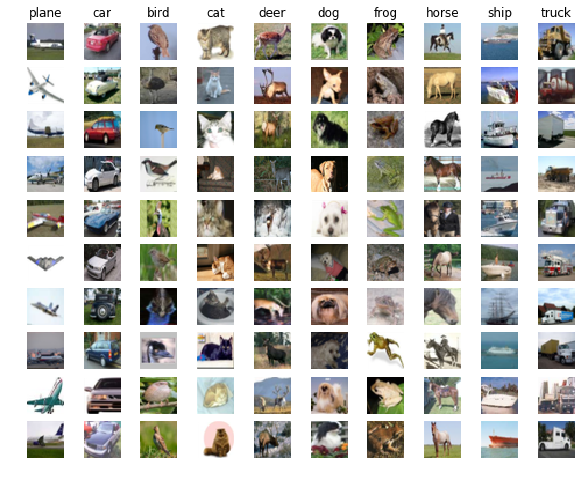

In [4]:
# Visualize some examples from the dataset.
# We show a few examples of training images from each class.
classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 10

for y, cls in enumerate(classes):
    idxs = np.flatnonzero(y_train == y)
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train[idx].astype('uint8'))
        plt.axis('off')
        if i == 0:
            plt.title(cls)
plt.show()

In [5]:
# Subsample the data for more efficient code execution in this exercise
# Because of masking instead of taking 50000 traing image we use 5000 traning image and instaed of 10000 testing images we use 
# 500 testing image
num_training = 5000
mask = list(range(num_training))
X_train = X_train[mask]
y_train = y_train[mask]

num_test = 500
mask = list(range(num_test))
X_test = X_test[mask]
y_test = y_test[mask]

# Reshape the image data into rows
X_train = np.reshape(X_train, (X_train.shape[0], -1))
X_test = np.reshape(X_test, (X_test.shape[0], -1))
print(X_train.shape, X_test.shape)

(5000, 3072) (500, 3072)


In [6]:
# This is present cs231n.classifiers it contains code for KNN classifier
from cs231n.classifiers import KNearestNeighbor
classifier = KNearestNeighbor()
classifier.train(X_train, y_train)